#Downloading dataset

In [ ]:
!gdown 1xkynpL15pt6KT3YSlDimu4A5iRU9qYck

Downloading...
From: https://drive.google.com/uc?id=1xkynpL15pt6KT3YSlDimu4A5iRU9qYck
To: /content/Flowers-Dataset.zip
100% 236M/236M [00:00<00:00, 255MB/s]


#Import Required Libraries

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/Flowers-Dataset.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
zip_ref

<zipfile.ZipFile [closed]>

In [ ]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/flowers/sunflower'
FLOWER_TULIP_DIR='/content/flowers/tulip'
FLOWER_DANDI_DIR='/content/flowers/dandelion'
FLOWER_ROSE_DIR='/content/flowers/rose'

#Data Extraction and Pre-processing and Train_Test split

In [ ]:
def assign_label(img,flower_type):
    return flower_type

In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
CLASS={}

In [ ]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 764/764 [00:02<00:00, 373.63it/s]

764


In [ ]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 733/733 [00:02<00:00, 305.87it/s]

1497


In [ ]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:02<00:00, 352.70it/s]

2481


In [ ]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:02<00:00, 350.67it/s]

3533


In [ ]:
make_train_data('Rose',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1052/1052 [00:02<00:00, 360.07it/s]

4585


In [ ]:
CLASSES={'Daisy':1,'Sunflower':1,'Tulip':2,'Dandelion':3,'Rose':4}

In [ ]:
CLASSES.values()

dict_values([1, 1, 2, 3, 4])

In [ ]:
X

[array([[[ 58, 110,  70],
         [ 53, 109,  68],
         [ 51, 104,  69],
         ...,
         [ 27,  55,  34],
         [ 28,  59,  32],
         [ 28,  59,  31]],
 
        [[ 52, 109,  67],
         [ 49, 105,  64],
         [ 49, 100,  63],
         ...,
         [ 31,  58,  38],
         [ 31,  60,  36],
         [ 33,  64,  37]],
 
        [[ 48, 106,  65],
         [ 46, 100,  60],
         [ 45,  95,  56],
         ...,
         [ 31,  57,  39],
         [ 36,  64,  43],
         [ 37,  67,  42]],
 
        ...,
 
        [[ 75, 114, 112],
         [ 36,  83,  75],
         [ 42,  91,  88],
         ...,
         [ 62,  61,  91],
         [ 60,  53,  85],
         [ 57,  45,  78]],
 
        [[ 44,  87,  84],
         [ 54, 105,  95],
         [ 31,  88,  78],
         ...,
         [ 61,  60,  91],
         [ 58,  51,  83],
         [ 55,  44,  76]],
 
        [[ 35,  84,  78],
         [ 38,  94,  84],
         [ 28,  90,  72],
         ...,
         [ 63,  61,  93],
  

In [ ]:
len(Z)

4585

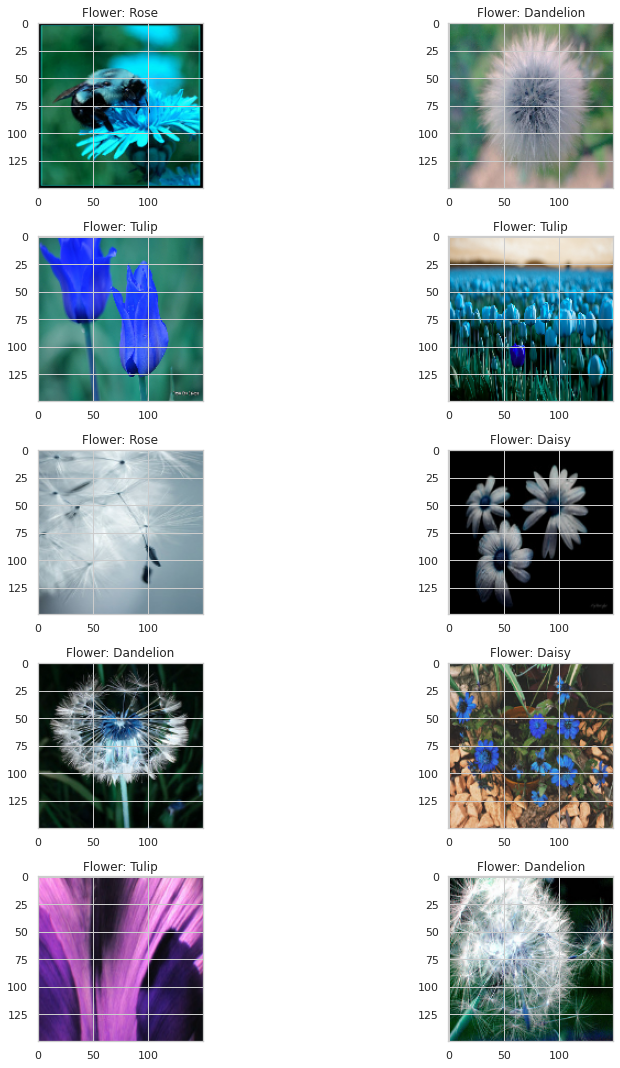

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

##Train-test split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
print(len(x_train),len(x_test),len(y_train),len(y_test))

3438 1147 3438 1147


#Image Augmentation

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [ ]:
datagen_train = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [ ]:
#Define number of Epochs and batch size
batch_size=128
epochs=50

# Using DataGenerator: 
'''Incorporate Image augmentation only for the training dataset, fitting it on test dataset may lead to unwanted results, 
as the real world data on which the model would be tested on will not give augmented images   '''
train_generator = datagen_train.flow(
    x_train,y_train,
    batch_size=batch_size)

#Model Creation and Addition of Layers

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  
model.add(Conv2D(96, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(96, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('softmax'))

#Compile the Model

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

#Fit the Model

In [ ]:
trained_model = model.fit_generator(train_generator,
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0]//batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
26/26 [==============================] - 28s 679ms/step - loss: 1.4844 - accuracy: 0.3290 - val_loss: 1.2265 - val_accuracy: 0.4821
Epoch 2/50
26/26 [==============================] - 15s 590ms/step - loss: 1.2031 - accuracy: 0.4710 - val_loss: 1.1445 - val_accuracy: 0.5240
Epoch 3/50
26/26 [==============================] - 16s 607ms/step - loss: 1.0826 - accuracy: 0.5233 - val_loss: 1.0265 - val_accuracy: 0.5641
Epoch 4/50
26/26 [==============================] - 17s 625ms/step - loss: 1.0113 - accuracy: 0.5520 - val_loss: 0.9663 - val_accuracy: 0.5963
Epoch 5/50
26/26 [==============================] - 15s 591ms/step - loss: 0.9856 - accuracy: 0.5595 - val_loss: 0.8961 - val_accuracy: 0.6024
Epoch 6/50
26/26 [==============================] - 16s 597ms/step - loss: 0.9492 - accuracy: 0.5867 - val_loss: 0.8737 - val_accuracy: 0.6234
Epoch 7/50
26/26 [==============================] - 15s 591ms/step - loss: 0.9369 - accuracy: 0.5722 - val_loss: 0.9233 - val_accuracy: 0.5955

#Save the Model

In [ ]:
model.save('flowers_prediction_cnn.h5')

#Test the Model

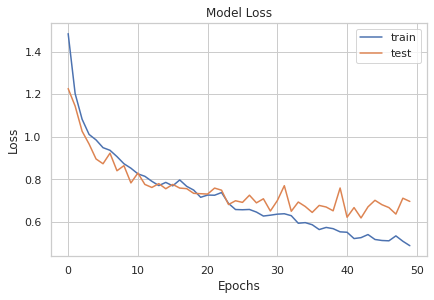

In [ ]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

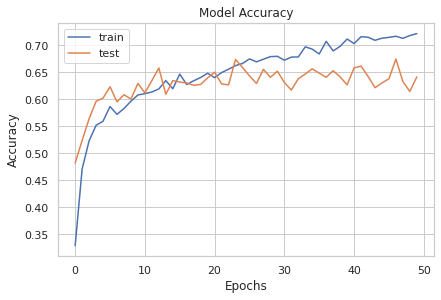

In [ ]:
plt.plot(trained_model.history['accuracy'])
plt.plot(trained_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [ ]:
import sklearn.metrics as metrics

[[158  22  10   6   7]
 [  1 163  80   6   2]
 [  1 216  26  11   3]
 [  2   9   3 178   4]
 [  4   6   9   9 211]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       203
           1       0.39      0.65      0.49       252
           2       0.20      0.10      0.14       257
           3       0.85      0.91      0.88       196
           4       0.93      0.88      0.91       239

    accuracy                           0.64      1147
   macro avg       0.66      0.66      0.65      1147
weighted avg       0.64      0.64      0.63      1147



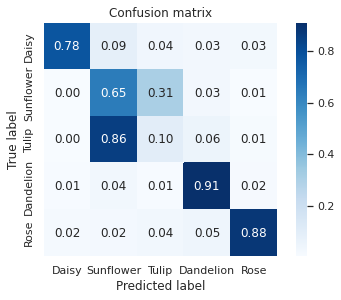

In [ ]:
def show_confusion_matrix(test_labels, predictions):
  """Compute confusion matrix and normalize."""
  confusion = confusion_matrix(
    np.argmax(test_labels, axis=1), np.argmax(pred, axis=1))
  confusion_normalized = confusion.astype("float") / confusion.sum(axis=1)
  axis_labels = list(CLASSES.keys())
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.2f', square=True)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

show_confusion_matrix(y_test,pred)


print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1)))